In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.head

<bound method NDFrame.head of                id             date      price  bedrooms  bathrooms  \
0      7129300520  20141013T000000   221900.0         3       1.00   
1      6414100192  20141209T000000   538000.0         3       2.25   
2      5631500400  20150225T000000   180000.0         2       1.00   
3      2487200875  20141209T000000   604000.0         4       3.00   
4      1954400510  20150218T000000   510000.0         3       2.00   
5      7237550310  20140512T000000  1225000.0         4       4.50   
6      1321400060  20140627T000000   257500.0         3       2.25   
7      2008000270  20150115T000000   291850.0         3       1.50   
8      2414600126  20150415T000000   229500.0         3       1.00   
9      3793500160  20150312T000000   323000.0         3       2.50   
10     1736800520  20150403T000000   662500.0         3       2.50   
11     9212900260  20140527T000000   468000.0         2       1.00   
12      114101516  20140528T000000   310000.0         3     

In [5]:
df.shape

(21613, 21)

In [6]:
a=df[['sqft_living', 'sqft_basement', 'sqft_living15', 'yr_renovated', 'sqft_lot','sqft_lot15',]]
a.head(10)

,sqft_living,sqft_basement,sqft_living15,yr_renovated,sqft_lot,sqft_lot15
0,1180,0,1340,0,5650,5650
1,2570,400,1690,1991,7242,7639
2,770,0,2720,0,10000,8062
3,1960,910,1360,0,5000,5000
4,1680,0,1800,0,8080,7503
5,5420,1530,4760,0,101930,101930
6,1715,0,2238,0,6819,6819
7,1060,0,1650,0,9711,9711
8,1780,730,1780,0,7470,8113
9,1890,0,2390,0,6560,7570


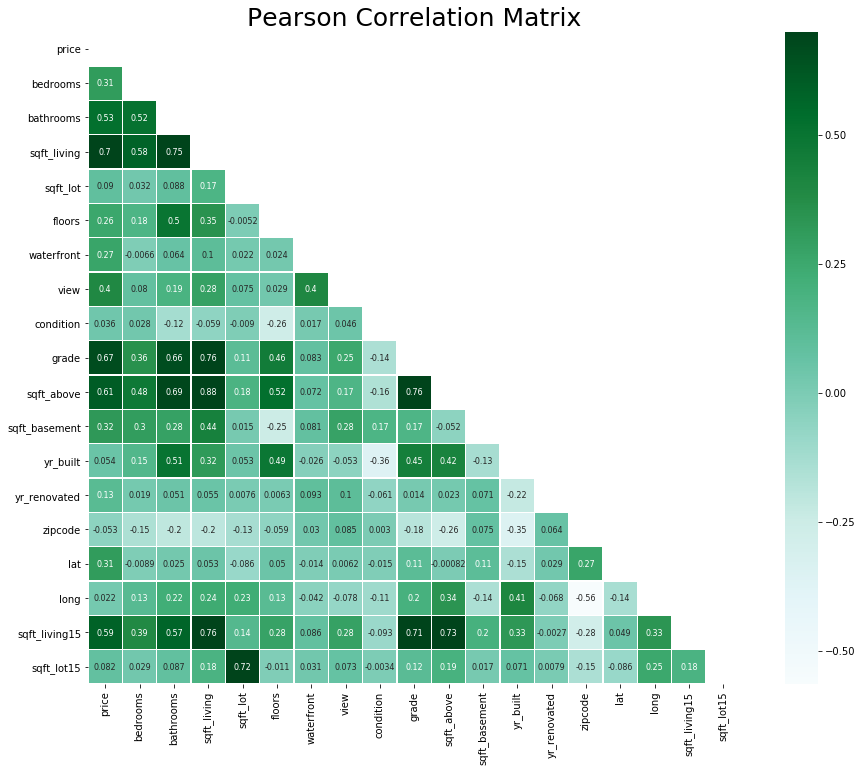

In [7]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
           'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
           'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
           linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": 1});

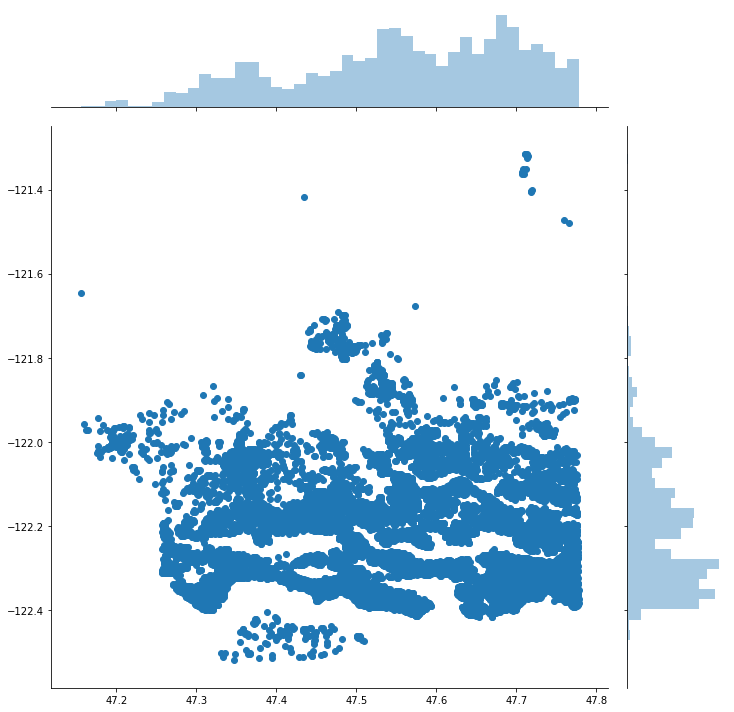

In [8]:
sns.jointplot(x=df.lat.values, y=df.long.values, height=10)

In [9]:
a=df[['price']] #use np if you work with Data Frame
a.shape
type(a)
#use iloc function when you don't now your data set very well

pandas.core.frame.DataFrame

In [10]:
a=df.iloc[:,20:].values
print(a)

[[5650]
 [7639]
 [8062]
 ...
 [2007]
 [1287]
 [1357]]


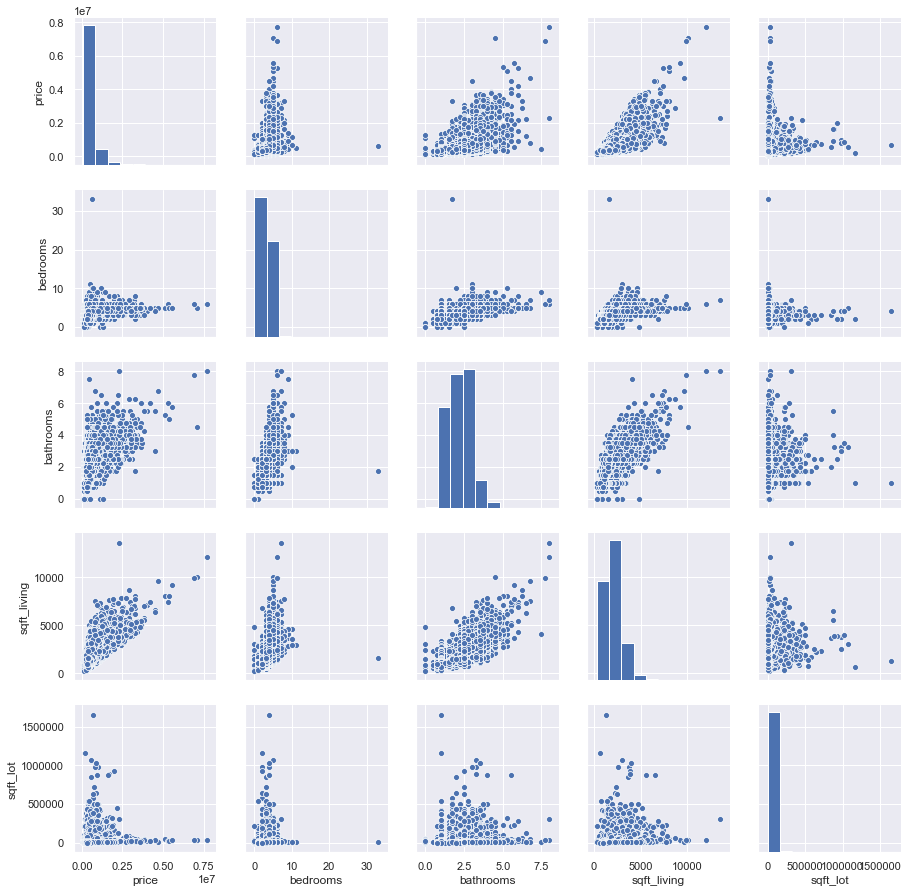

In [11]:
sns.set()
cols=['price','bedrooms','bathrooms','sqft_living','sqft_lot']
sns.pairplot(df[cols], height=2.5)
plt.show()

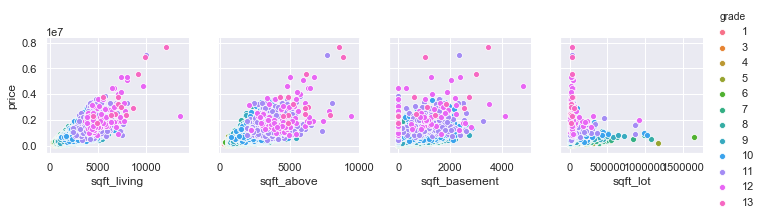

In [12]:
sns.pairplot(df, x_vars=['sqft_living','sqft_above','sqft_basement','sqft_lot'], y_vars=["price"], hue="grade")

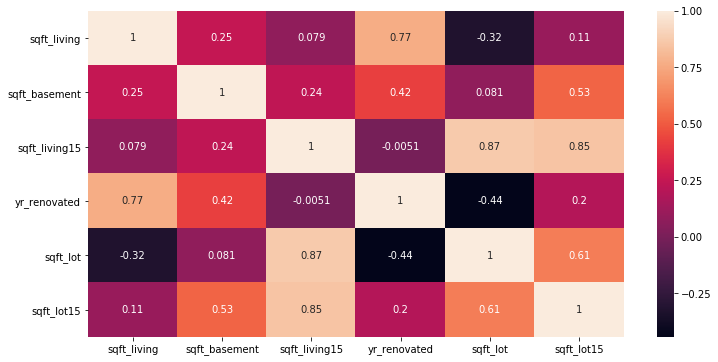

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.heatmap(df.corr(), annot=True)

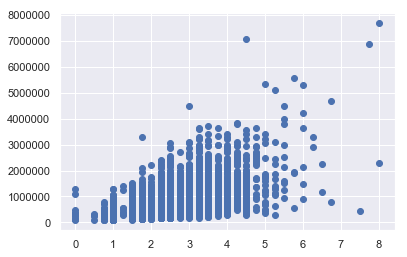

In [14]:
plt.scatter(df.bathrooms, df.price)

In [15]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


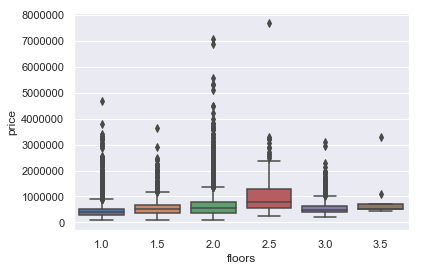

In [52]:
sns.boxplot(df.floors, df.price)

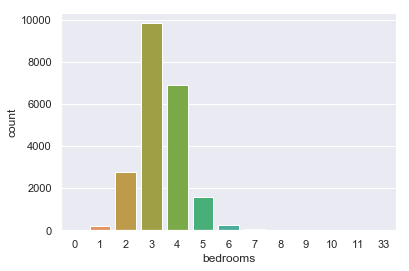

In [17]:
sns.countplot(x='bedrooms', data=df)

In [18]:
df.groupby('bedrooms').count()

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,,,
0,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
1,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199
2,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760
3,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824
4,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882
5,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601
6,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272
7,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
8,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [19]:
df = df[df['bedrooms']!=0]

In [20]:
df['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
5        98053
6        98003
7        98198
8        98146
9        98038
10       98007
11       98115
12       98028
13       98074
14       98107
15       98126
16       98019
17       98103
18       98002
19       98003
20       98133
21       98040
22       98092
23       98030
24       98030
25       98002
26       98119
27       98112
28       98115
29       98052
         ...  
21583    98102
21584    98116
21585    98042
21586    98107
21587    98125
21588    98117
21589    98038
21590    98074
21591    98178
21592    98103
21593    98056
21594    98042
21595    98103
21596    98059
21597    98040
21598    98001
21599    98053
21600    98004
21601    98125
21602    98010
21603    98065
21604    98144
21605    98056
21606    98136
21607    98116
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21600, dtype: int64

In [21]:
df['date'].head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

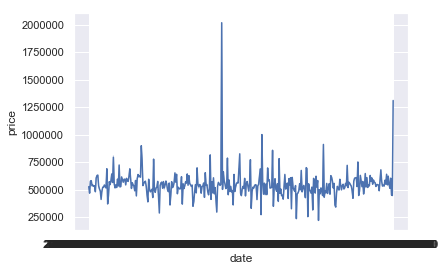

In [22]:
sns.lineplot(x="date", y="price", data=df, ci=False)

In [23]:
a=pd.to_datetime(df.date.str.split("T")[0][0], format='%Y%m%d', errors='ignore')

#from this point below, it refers to the code to temper all the values in a column
result=[]
elements=df.date.values
for element in elements: #for i in range(len(elements))
    counter=(element.split("T"))[0] #replace element with elements[i]
    final=pd.to_datetime(counter, format='%Y%m%d', errors='ignore')
    result.append(final)
result
#df['date']=result

[Timestamp('2014-10-13 00:00:00'),
 Timestamp('2014-12-09 00:00:00'),
 Timestamp('2015-02-25 00:00:00'),
 Timestamp('2014-12-09 00:00:00'),
 Timestamp('2015-02-18 00:00:00'),
 Timestamp('2014-05-12 00:00:00'),
 Timestamp('2014-06-27 00:00:00'),
 Timestamp('2015-01-15 00:00:00'),
 Timestamp('2015-04-15 00:00:00'),
 Timestamp('2015-03-12 00:00:00'),
 Timestamp('2015-04-03 00:00:00'),
 Timestamp('2014-05-27 00:00:00'),
 Timestamp('2014-05-28 00:00:00'),
 Timestamp('2014-10-07 00:00:00'),
 Timestamp('2015-03-12 00:00:00'),
 Timestamp('2015-01-24 00:00:00'),
 Timestamp('2014-07-31 00:00:00'),
 Timestamp('2014-05-29 00:00:00'),
 Timestamp('2014-12-05 00:00:00'),
 Timestamp('2015-04-24 00:00:00'),
 Timestamp('2014-05-14 00:00:00'),
 Timestamp('2014-08-26 00:00:00'),
 Timestamp('2014-07-03 00:00:00'),
 Timestamp('2014-05-16 00:00:00'),
 Timestamp('2014-11-20 00:00:00'),
 Timestamp('2014-11-03 00:00:00'),
 Timestamp('2014-06-26 00:00:00'),
 Timestamp('2014-12-01 00:00:00'),
 Timestamp('2014-06-

In [24]:
#how to convert the data
counter=df["date"].values
a=counter[0].split("T")
year=counter[0][0:4]
month=counter[0][4:6]
day=counter[0][6:8]
print(year+"-"+month+"-"+day)

2014-10-13


In [25]:
df.columns #["id", "date" "sqft_living" "sqft_lot15"] target="price"[]

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
df = pd.read_csv('kc_house_data.csv')
x=df.drop(["id", "date", "view", "sqft_living", "lat", "long", "sqft_lot15", "price"], axis=1) #features
y=df["price"] #target
x.shape

(21613, 13)

In [27]:
x.isnull().sum() #gives null values in a df
x.isnull().values.any() #gives yes or no if null is present indf

False

In [28]:
df.groupby('floors').size()

floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
dtype: int64

In [53]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [54]:
df.groupby('zipcode').size()

zipcode
98001    362
98002    199
98003    280
98004    317
98005    168
98006    498
98007    141
98008    283
98010    100
98011    195
98014    124
98019    190
98022    234
98023    499
98024     81
98027    412
98028    283
98029    321
98030    256
98031    274
98032    125
98033    432
98034    545
98038    590
98039     50
98040    282
98042    548
98045    221
98052    574
98053    405
        ... 
98092    351
98102    105
98103    602
98105    229
98106    335
98107    266
98108    186
98109    109
98112    269
98115    583
98116    330
98117    553
98118    508
98119    184
98122    290
98125    410
98126    354
98133    494
98136    263
98144    343
98146    288
98148     57
98155    446
98166    254
98168    269
98177    255
98178    262
98188    136
98198    280
98199    317
Length: 70, dtype: int64

In [61]:
#lambda argument : expression
#lambda x : x+1 #x willbe replaced by x+1
#you have to use apply first 
#def sum(a,b):
#    return a+b
#df.apply(sum())

df["basement"] = df['sqft_basement'].apply(lambda x: 1 if x!=0 else 0) #this is a single tuple it has one variable


In [59]:
df["basement"].head()

0    0
1    1
2    0
3    1
4    0
Name: basement, dtype: int64

In [58]:
df[['id', 'price', 'basement']].head()

,id,price,basement
0,7129300520,221900.0,0
1,6414100192,538000.0,1
2,5631500400,180000.0,0
3,2487200875,604000.0,1
4,1954400510,510000.0,0


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [9]:
from sklearn.linear_model import LinearRegression
LM = LinearRegression()
LM.fit(x_train,y_train)
y_pred = LM.predict(x_test)
LM_r2 = r2_score(y_test, y_pred)
#from sklearn.metrics

print("R2 score:", LM_r2)
print("MSE:", mean_squared_error (y_test, y_pred))

NameError: name 'x_train' is not defined

# LinearRegression

In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.25, random_state=10)

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)
model2.predict(x_test)
y_pred = model2.predict(x_test)
PF_r2 = r2_score(y_test, y_pred)
#from sklearn.metrics

print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error (y_test, y_pred))

R2 score: 0.7561774955925068
MSE: 34280457843.86314


# PolynomialFeatures

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=10)
from sklearn.svm import SVR
model3 = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False).fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

print("R2 score:", r2_score(y_test, y_pred3))
print("MSE:", mean_squared_error (y_test, y_pred3))

R2 score: -0.05766877483861976
MSE: 148703951412.25284


# SVR

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)
y_pred4 = model4.predict(x_test) 

print("R2 score:", r2_score(y_test, y_pred4))
print("MSE:", mean_squared_error (y_test, y_pred4))

R2 score: 0.6326329485697336
MSE: 51650321410.57985


# DecisionTree

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_train, y_train)
y_pred5 = model5.predict(x_test) 

print("R2 score:", r2_score(y_test, y_pred5))
print("MSE:", mean_squared_error (y_test, y_pred5))

R2 score: 0.802730958419297
MSE: 27735229281.808453


# RandomForest

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=10)
from sklearn.neighbors import KNeighborsRegressor
model6 = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
y_pred6 = model6.predict(x_test)

print("R2 score:", r2_score(y_test, y_pred6))
print("MSE:", mean_squared_error (y_test, y_pred6))

R2 score: 0.5589869810694613
MSE: 62004646539.01132


# KNN

In [62]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement'],
      dtype='object')

In [ ]:
#Create tuple insight the models
models=[("LR",LinearRegression()), ("DTC", DecisionTreeRegressor()), 
        ("KNC", KNeighborsRegressor()), ("SVR", SVR()), ("PF", PolynomialFeatures()), 
        ("RFC", RandomForestClassifier())]



In [ ]:
#if we want to store results it should be insight of data structure(list, tuple, dictionary..) 

trained_models=[]
my_predictions=[]

from sklearn.metrics import r2_score, mean_squared_error
results=[]

for name, model in models:
    #print(element[0])
    _model=model #value 1
    _model.fit(x_train, y_train)
    _y_pred=_model.predict(x_test)#value 2
    _r2_score=(r2_score(y_test, _y_pred)) #value 3
    _mean_squared_error=(mean_squared_error(y_test, _y_pred)) #value 4
    model_details=[_model, _y_pred, _r2_score, _mean_squared_error]
    results.append(model_details)
    
results[0][2]
results[1][2]


In [74]:
_model.fit(x_train, y_train)
_y_pred=_model.predict(x_test)#value 2
_r2_score=(r2_score(y_test, _y_pred)) #value 3
_mean_squared_error=(mean_squared_error(y_test, _y_pred)) #value 4
model_details=[_model, _y_pred, _r2_score, _mean_squared_error]
results.append(model_details)

In [76]:
print("_r2_score:", r2_score(y_test, y_pred))

results=[]

for name, model in models:
   
    _model=model
    print(_r2_score)


_r2_score: -0.05766877483861976
0.37909755485055274
0.37909755485055274
0.37909755485055274
0.37909755485055274
0.37909755485055274
0.37909755485055274


In [26]:
#counter=[]
#timer=[1,2,3,4,5,6]

#for element in results:
#    counter.append(element[3])
#    print(element[3])

#plt.plot(timer, counter)
#plt.scatter(timer, counter)
#plt.show()

In [27]:
#from sklearn.feature_selector import FeatureSelector

In [28]:
#df.identify_collinear(correlation_threshold=0.98)
#df.plot_collinear()

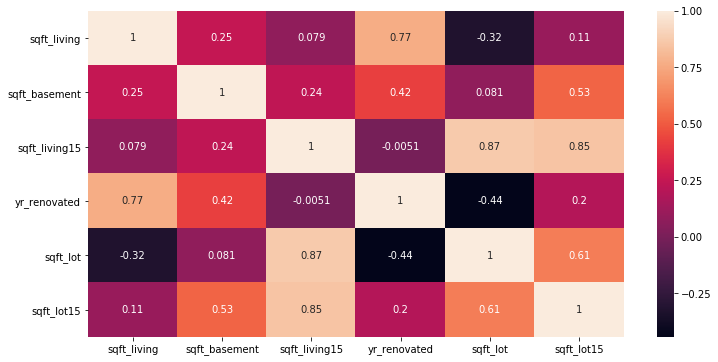

In [29]:

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.heatmap(df[['sqft_living', 'sqft_basement', 'sqft_living15', 'yr_renovated', 'sqft_lot','sqft_lot15',]].corr(), annot=True, ax = ax)

In [37]:
#Results:
#LinearRegression
#R2 score: 0.6505394241989275
#MSE: 49132743369.82261
#PolynomialFeatures 
#R2 score: 0.7561774955925068
#MSE: 34280457843.86314
#SVR    
#R2 score: -0.05766877483861976
#MSE: 148703951412.25284
#DecisionTree
#R2 score: 0.6326329485697336
#MSE: 51650321410.57985
#RandomForest
#R2 score: 0.802730958419297
#MSE: 27735229281.808453
#KNN
#R2 score: 0.5589869810694613
#MSE: 62004646539.01132

    

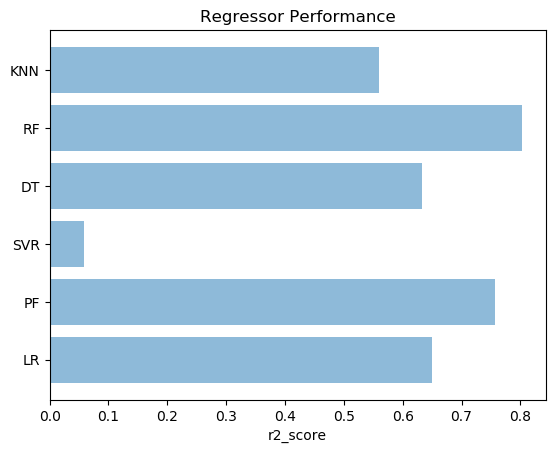

In [38]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('LR', 'PF', 'SVR', 'DT', 'RF', 'KNN')
y_pos = np.arange(len(objects))
performance = [0.6505,0.75617,0.05766,0.63263,0.80273,0.55898]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('r2_score')
plt.title('Regressor Performance')

plt.show()



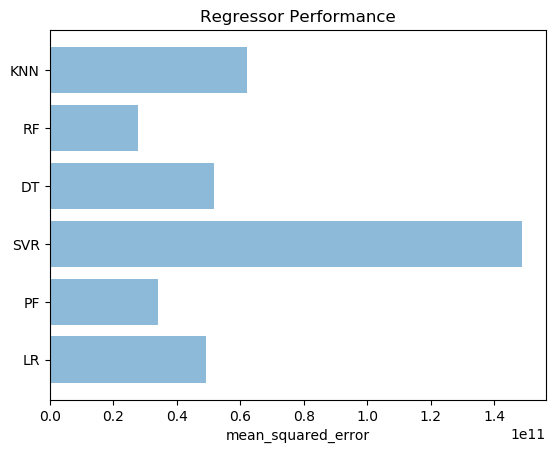

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('LR', 'PF', 'SVR', 'DT', 'RF', 'KNN')
y_pos = np.arange(len(objects))
performance = [49132743369,34280457843,148703951412,51650321410,27735229281,62004646539]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('mean_squared_error')
plt.title('Regressor Performance')

plt.show()

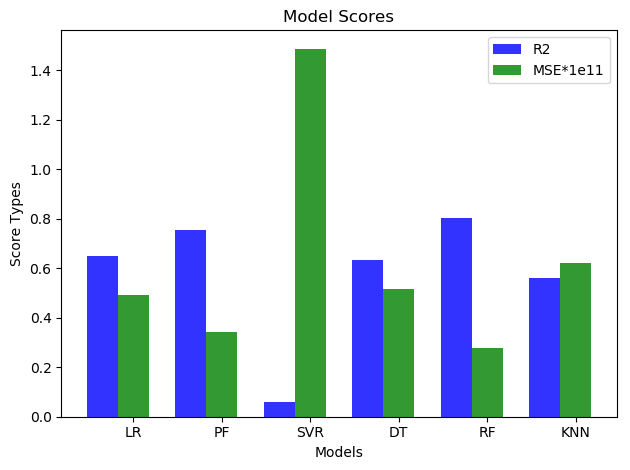

In [47]:
n_groups = 6
performance_R2 = (0.6505,0.75617,0.05766,0.63263,0.80273,0.55898)
performance_MSE = (0.49132743369,0.34280457843,1.48703951412,0.51650321410,0.27735229281,0.62004646539)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, performance_R2, bar_width, alpha=opacity, color='b', label='R2')

rects2 = plt.bar(index + bar_width, performance_MSE, bar_width, alpha=opacity, color='g', label='MSE*1e11')

plt.xlabel('Models')
plt.ylabel('Score Types')
plt.title('Model Scores')
plt.xticks(index + bar_width, ('LR', 'PF', 'SVR', 'DT', 'RF', 'KNN'))
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
#df[df.sqft_lot <=600]
#indexNames =df[ (df['bedrooms'])].index

In [ ]:
#df[] = df['date'].astype(str).str[0:8])

In [1]:
def calculate_house_sale_price(sqft_living, sqft_basement, sqft_living15, yr_renovated, sqft_lot, sqft_lot15, cof):
    
    sqft_living_coef = cof[0]
    sqft_basement_coef = cof[1]
    sqft_living15_coef = cof[2]
    yr_renovated_coef = cof[3]
    sqft_lot_coef = cof[4]
    sqft_lot15_coef = cof[5]
    
    result = (( sqft_living_coef* sqft_living)
              + (sqft_basement_coef*sqft_basement) 
              + (sqft_living15_coef*sqft_living15)
              + (yr_renovated_coef*yr_renovated)
              + (sqft_lot_coef*sqft_lot)
              + (sqft_lot15_coef*sqft_lot15)
              + inter)
    
    return result

In [ ]:
# Let's calculate house sale price using some random values!
net_sale = calculate_net_annual_sale(square_feet = 2000, Inventory = 300, 
                                     Advertizing = 100, Size_of_Sales_District = 3,
                                     no_competing_stores = 2,
                                     inter = loaded_stored_model.intercept_,
                                     cof = loaded_stored_model.coef_)
print("Our net annual sale $:", round(net_sale, 2))

In [12]:
plt.xlabel("Historical Price")
plt.ylabel("Predicted Price")
plt.title('Price prediction using LR')
plt.xticks(rotation=45)
sns.regplot(x=y_test,y= y_pred,data=kch_data, color="red")

NameError: name 'plt' is not defined